In [ ]:
# ================================================
# 必要なライブラリのインポートと表示設定
# ================================================

# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# グラフ描画用ライブラリ
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # 日付データを扱うための補助ツール
import seaborn as sns

sns.set()  # Seabornのデフォルトスタイルを有効化（見やすいグラフにする）

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa  # 時系列解析用のモジュール

# --------------------------------
# グラフの日本語表記設定
# --------------------------------
from matplotlib import rcParams

rcParams["font.family"] = "IPAexGothic"
rcParams["font.sans-serif"] = "Meiryo"  # 日本語を「メイリオ」で表示

# --------------------------------
# DataFrame の全角文字（日本語など）の出力を整形
# --------------------------------
pd.set_option("display.unicode.east_asian_width", True)
# これにより、DataFrameを print したときに
# 全角文字がきれいに整列して表示される

In [ ]:
# -------------------------------------------------------
# 📊 表示設定（出力結果やグラフの見やすさを調整）
# -------------------------------------------------------

# numpy の配列出力設定：
#   - linewidth：配列を1行に収める最大文字数を設定。
#   - 長い配列でも折り返されずに横方向に出力されるようにする。
np.set_printoptions(linewidth=60)

# pandas の表示設定：
#   - display.width：DataFrame の横幅を文字数で指定。
#   - 長いカラム名や複数列を表示する際に、横方向で折り返しが発生しにくくなる。
pd.set_option("display.width", 60)

# matplotlib のデフォルト描画サイズ設定：
#   - rcParams は matplotlib の全体設定（runtime configuration）を管理する辞書。
#   - figure.figsize でグラフの初期サイズを指定（幅=8インチ, 高さ=4インチ）。
from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

# 📝 この設定により、ノートブックやターミナル上での出力が
#     ・横幅に収まりやすくなる
#     ・可視化が統一される
#   といった利点がある。

In [4]:
# -------------------------------------------------------
# 🎲 正規分布に従う乱数の生成
# -------------------------------------------------------

# ① 乱数の種を固定
#   - np.random.seed(1) により乱数の再現性を確保する。
#   - 同じ seed 値を指定すると、毎回同じ乱数系列が生成される。
np.random.seed(1)

# ② 正規分布（平均0, 標準偏差1）に従う乱数を生成
#   - loc   : 平均値（μ）= 0
#   - scale : 標準偏差（σ）= 1
#   - size  : 生成するサンプル数 = 4
#   - stats.norm.rvs() は SciPy の関数で、「連続確率分布から乱数を生成」するために用いられる。
from scipy import stats

stats.norm.rvs(loc=0, scale=1, size=4)

# ✅ 出力は例として以下のような形になる：
# array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])
#
# これは平均0・標準偏差1の正規分布（ガウス分布）から得られた4つのサンプルである。

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

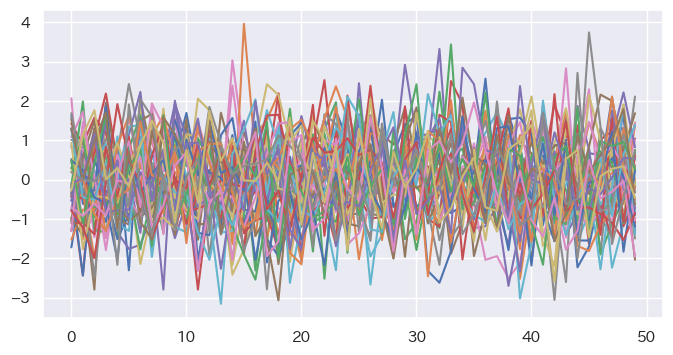

In [5]:
# -------------------------------------------------------
# 📈 正規ホワイトノイズ系列の作成と可視化
# -------------------------------------------------------

# ① 生成する系列の数を指定
#   - 50本のホワイトノイズ系列を作成して可視化する。
n_sim = 50

# ② 乱数の種を固定（再現性の確保）
#   - 同じ結果を何度実行しても再現できるようにする。
np.random.seed(1)

# ③ 正規ホワイトノイズ系列の作成と可視化
#   - for ループで50回繰り返し、毎回異なるノイズ系列を生成。
#   - stats.norm.rvs()：平均0、標準偏差1の正規分布から50個のサンプルを生成。
#   - sns.lineplot()：各系列を折れ線グラフとして描画する。
#     → 結果として、0を中心にランダムに上下するノイズ系列が複数描かれる。
from scipy import stats
import seaborn as sns

for i in range(1, n_sim):
    hn = stats.norm.rvs(loc=0, scale=1, size=50)  # 正規ホワイトノイズ
    sns.lineplot(x=range(0, 50), y=hn)

# ✅ ホワイトノイズとは：
#    ・自己相関がない（時点間の関係がランダム）
#    ・平均が0、分散が一定
#    ・将来の値を過去の値から予測できない
#    という性質を持つ、時系列解析の基本的な前提モデルである。

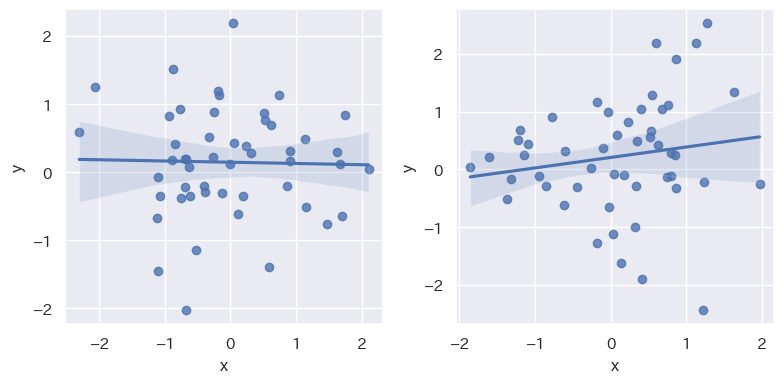

In [6]:
# -------------------------------------------------------
# 🎲 ホワイトノイズ系列間の関係と回帰直線の可視化
# -------------------------------------------------------

# ① 乱数の種を固定（再現性の確保）
#   - 毎回同じ乱数を生成できるようにする。
np.random.seed(1)

# ② 2つのグラフを並べて表示する準備
#   - figsize=(8, 4)：横8インチ・縦4インチの図全体サイズ
#   - ncols=2：横に2つのサブプロットを作る
#   - tight_layout=True：図同士の間隔を自動調整して詰まりを防ぐ
fig, ax = plt.subplots(figsize=(8, 4), ncols=2, tight_layout=True)

# ③ 正規ホワイトノイズ系列を2組作り、散布図＋回帰直線を描画
for i in range(0, 2):
    # 平均0・標準偏差1の正規分布に従う乱数を生成
    x = stats.norm.rvs(loc=0, scale=1, size=50)
    y = stats.norm.rvs(loc=0, scale=1, size=50)

    # DataFrameとしてまとめる
    data_sim = pd.DataFrame({"x": x, "y": y})

    # 散布図＋回帰直線を描画（Seabornのregplot）
    sns.regplot(x="x", y="y", data=data_sim, ax=ax[i])
    # → 各点はホワイトノイズに基づく乱数ペア
    # → 回帰直線は「偶然の相関」を可視化（実際には無相関である）

# ✅ 解説：
#    ・x と y は互いに独立なホワイトノイズなので、理論的には相関は 0。
#    ・しかしサンプル数が有限（50）なので、偶然的に傾きが生じることがある。
#    ・この「見かけの相関（spurious correlation）」は時系列分析でも重要な注意点。

In [7]:
# -------------------------------------------------------
# 🎲 無相関データに対する回帰分析を多数回シミュレーション
# -------------------------------------------------------

# ① シミュレーション回数の設定
#    → 1000回分のランダムデータを生成して検証
n_sim = 1000

# ② 各シミュレーションで得られた F 値（F比）を格納する配列を準備
#    → 最初はすべて 0 の状態で初期化
f_ratio_array = np.zeros(n_sim)

# ③ 乱数の再現性を確保
np.random.seed(1)

# ④ シミュレーションのループ
for i in range(1, n_sim):

    # --- データ生成 ---
    # 平均0・標準偏差1の正規分布に従う乱数を 50 個ずつ生成
    x = stats.norm.rvs(loc=0, scale=1, size=50)
    y = stats.norm.rvs(loc=0, scale=1, size=50)

    # x, y を DataFrame にまとめる
    data_sim = pd.DataFrame({"x": x, "y": y})

    # --- 回帰分析 ---
    # y ~ x の単回帰モデルを構築
    lm_model_sim = smf.ols(formula="y ~ x", data=data_sim).fit()

    # --- 結果の記録 ---
    # モデルから F 値を取得して格納
    f_ratio_array[i] = lm_model_sim.fvalue

# ✅ 解説：
# ・x と y は独立（真の関係なし）なので、理論的には回帰係数 = 0。
# ・しかし有限サンプルでは偶然に相関が発生し、F値が0より大きくなることがある。
# ・これを多数回シミュレーションして、F値の分布（帰無分布）を確認する目的。
# ・このような検証は「有意水準5%でどの程度のF値が出るか」を理解する助けとなる。

In [8]:
# -------------------------------------------------------
# 📊 回帰モデルの自由度（群間変動の自由度）を確認
# -------------------------------------------------------

# モデルの自由度（df_model）を出力
lm_model_sim.df_model

# ✅ 解説：
# ・`df_model` は「モデルの自由度（回帰に使われる説明変数の数 − 1）」を表す。
# ・この例では回帰式が `y ~ x` なので、説明変数 x が 1 つ。
# 　　→ よって df_model = 1
# ・F検定では、分子の自由度（群間変動）としてこの値が使われる。
# ・一方、誤差（残差）側の自由度は `lm_model_sim.df_resid` で確認できる。
# 　　→ 通常、観測数 n − パラメータ数 で計算される。

1.0

In [9]:
# -------------------------------------------------------
# 📉 残差の自由度（群内変動の自由度）を確認
# -------------------------------------------------------

# 残差（誤差項）の自由度を出力
lm_model_sim.df_resid

# ✅ 解説：
# ・`df_resid` は「残差の自由度（群内変動の自由度）」を表す。
# ・これは、観測数 n からモデルの推定パラメータ数を引いた値に等しい。
# 　　つまり： df_resid = n - p
# 　　ここで、p は切片を含む回帰係数の数。
#
# ・この例では：
# 　　- 観測数 n = 50
# 　　- 推定パラメータ（切片＋x）= 2
# 　　→ よって df_resid = 50 - 2 = 48
#
# ・F検定における分母の自由度（誤差側）は、この値を用いる。

48.0

<Axes: xlabel='x', ylabel='Density'>

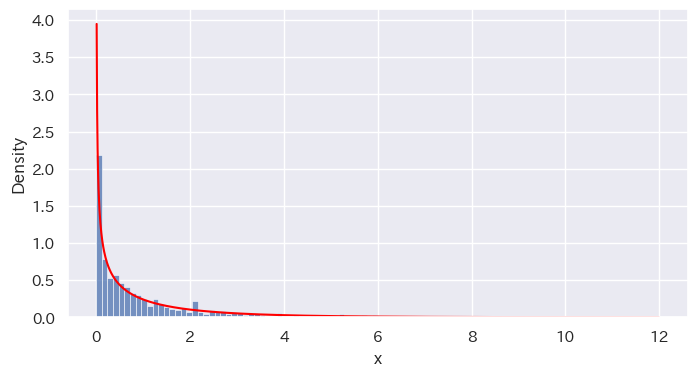

In [10]:
# -------------------------------------------------------
# 📈 F比のシミュレーション結果と理論F分布の比較
# -------------------------------------------------------

# F比のヒストグラム（実際のシミュレーション結果）
sns.histplot(f_ratio_array, stat="density", bins=100)

# 理論的なF分布の計算
# dfn: 分子の自由度（モデルの自由度 = 1）
# dfd: 分母の自由度（残差の自由度 = 48）
f_df = pd.DataFrame({"x": np.arange(0, 12, 0.01)})
f_df["density"] = stats.f.pdf(f_df.x, dfn=1, dfd=48)

# 理論F分布を赤い折れ線で重ねる
sns.lineplot(x="x", y="density", data=f_df, color="red")

# ✅ 解説：
# ・青のヒストグラムは、1000回のシミュレーションによって得られた F 比の経験分布。
# ・赤の線は、理論上の F(1, 48) 分布（帰無仮説が真の場合の理論分布）。
# ・両者がほぼ一致していれば、F 検定が正しく機能していることを意味する。
# ・この分布の右側（裾）に行くほど、帰無仮説「説明変数xに効果なし」を棄却しやすくなる。

In [11]:
# F分布の95％点を求める
# q=0.95：上側確率0.05の臨界値（有意水準5%の右側境界）
# dfn=1：分子の自由度（説明変数の数）
# dfd=48：分母の自由度（残差の自由度）
# → F値がこの値を超えると、帰無仮説を棄却（モデルが有意）
stats.f.ppf(q=0.95, dfn=1, dfd=48)

4.042652128566653

In [12]:
# 間違って帰無仮説を棄却してしまう確率（第1種の過誤）
# 「本当は関係がない（帰無仮説が真）」にもかかわらず、
# シミュレーション上の F値が臨界値を超えてしまう割合を求める。

# F値が臨界値（上側5%点）より大きいケースを数える
# それをシミュレーション回数で割ることで確率を算出
sum(f_ratio_array > stats.f.ppf(q=0.95, dfn=1, dfd=48)) / n_sim

0.046